In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import seaborn as sns
from scipy import stats
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
import sys
!{sys.executable} -m pip install python-pptx

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
from pptx import Presentation
from pptx.util import Inches

In [4]:
# read in the entire dataset
master = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

master = master[(master['EffMeas'] == 'LR')]

In [5]:
imglst = []

In [6]:
surfaces = ['Any Painted Surface', 'Cellulose Insulation', 'Cement', 'Cinder Block', 'Concrete', 'Decorative Laminate', 
            'Dry Wall', 'Fiberglass Wall Paneling', 'Glass', 'Painted Cinder Block', 'Painted Dry Wall', 'Painted Wallboard',
            'Plastic Walls', 'Plate Glass', 'Plywood', 'Stainless Steel', 'Treated Wood', 'Wallboard', 'Wallboard Paper', 
            'Brick', 'Tyvek', 'Carpet', 'Industrial Carpet', 'Loop-Pile Carpet', 'Nylon Carpet', 'Office Carpet', 
            'Woven Carpet', 'Ceramic', 'Granite', 'Grimed and Washed Tile', 'Grimed Tile', 'Hardwood', 'Laminate', 'Linoleum',
            'Rubber Flooring', 'Tile', 'Vinyl Tile', 'Vinyl Flooring', 'Wood', 'Wood Laminate', 'Wood Tiles', 
            'Acoustic Ceiling Tiles', 'Ceiling Tile', 'Biofilm Covered Copper Pipe', 'Biofilm Covered PVC Pipe', 'Carbon Steel',
            'Fiberglass Lined HVAC Duct', 'Galvanized Metal', 'Galvanized Metal HVAC Duct', 'Galvanized Steel', 
            'Metal Ductwork', 'Polyvinyl Chloride', 'Steel', 'Wiring Insulation', 'Aluminum', 'Butyl Rubber', 'Chair Back',
            'Chair Seat', 'Cork Boards', 'Cotton Cloth', 'Desk Top', 'Epoxy', 'Filing Cabinet', 
            'Food Packaging Material (Presumably Plastic)', 'Keyboard', 'Mylar', 'Nylon', 'Office Air', 'Paint', 
            'Painted Canvas', 'Paper', 'Particle Board', 'Plastic', 'Polycarbonate', 'Polyethylene', 'Polyolefin', 
            'Polypropylene', 'Polystyrene', 'Polyurethane', 'Porcelain', 'Silk Fabric', 'Teflon', 'Vinyl Seating', 'Asphalt',
            'Asphalt Paving', 'Deck Wood', 'Rough Surface Patio Tiles', 'Rough-Cut Wood', 'Smooth Surface Patio Tiles',
            'Natural Water', 'Water', 'Arizona Test Dust', 'Topsoil', 'Painted Aluminum Alloy', 'Painted Steel', 
            'Painted Metal', 'Polyolefine', 'Tire', 'Painted Paper', 'Polyurethane Painted Aluminum', 'Steel', 'Untreated Wood',
           'Painted Concrete', 'Carbon Steel', 'Aluminum', 'Grimed Concrete', 'Grimed Steel']

In [7]:
params = [
    ('Fumigation and Fiberglass Lined HVAC Duct', 'Loading'),
    ('Liquid Spray and Galvanized Metal', 'Loading'),
    ('Liquid Spray and Arizona Test Dust', 'Loading'),
    ('Fumigation and Arizona Test Dust', 'Loading'),
    ('Fumigation and Painted Steel', 'Loading'),
    ('Liquid Immersion and Carpet', 'Loading'),
    ('Liquid Spray and Treated Wood', 'Loading'),
    ('Foam Spray and Brick', 'Loading'),
    ('Liquid Immersion and Stainless Steel', 'Loading'),
    ('Fumigation and Painted Joint Tape', 'ConcDose'),
    ('Fumigation and Keyboard', 'ConcDose'),
    ('Fumigation and Aluminum', 'ConcDose'),
    ('Fumigation and Fiberglass Lined HVAC Duct', 'ConcDose'),
    ('Fumigation and Galvanized Metal', 'ConcDose'),
    ('Fumigation and Painted Dry Wall', 'ConcDose'),
    ('Fumigation and Arizona Test Dust', 'ConcDose'),
    ('Fumigation and Metal Ductwork', 'ConcDose'),
    ('Fumigation and Cinder Block', 'ConcDose'),
    ('Liquid Spray and Carpet', 'ConcDose'),
    ('Liquid Spray and Painted Pained Wallboard', 'ConcDose'),
    ('Liquid Spray and Industrial Carpet', 'ConcDose'),
    ('Liquid Spray and Stainless Steel (Spores Applied after Decon Agent)', 'ConcDose'),
    ('Fumigation and Treated Wood', 'ConcDose'),
    ('Liquid Spray and Stainless Steel + 0.3% Organic Burden', 'ConcDose'),
    ('Liquid Immersion and Horse Serum Residue on Stainless Steel', 'ConcDose'),
    ('Liquid Spray and Smooth Surface Patio Tiles', 'ConcDose'),
    ('Fumigation and Fiberglass Lined HVAC Duct', 'ClO2'),
    ('Fumigation and Painted Dry Wall', 'ClO2'),
    ('Fumigation and Cinder Block', 'ClO2'),
    ('Fumigation and Laminate', 'H2O2'),
    ('Fumigation and Galvanized Metal HVAC Duct', 'H2O2'),
    ('Fumigation and Painted Joint Tape', 'Temp'),
    ('Fumigation and Keyboard', 'Temp'),
    ('Liquid Spray and Galvanized Metal', 'Temp'),
    ('Physical and Aerosol', 'Temp'),
    ('Liquid Spray and Arizona Test Dust', 'Temp'),
    ('Fumigation and Arizona Test Dust', 'Temp'),
    ('Liquid Immersion and Carpet', 'Temp'),
    ('Liquid Spray and Stainless Steel with Organic Load', 'Temp'),
    ('Liquid Spray and Treated Wood', 'Temp'),
    ('Foam Spray and Brick', 'Temp'),
    ('Liquid Spray and Brick', 'Temp'),
    ('Fumigation and Grimed Steel', 'RH'),
    ('Fumigation and Painted Joint Tape', 'RH'),
    ('Fumigation and Keyboard', 'RH'),
    ('Fumigation and Aluminum', 'RH'),
    ('Fumigation and Silk Fabric', 'RH'),
    ('Fumigation and Archival Paper', 'RH'),
    ('Fumigation and Painted Canvas', 'RH'),
    ('Physical and Aerosol', 'RH'),
    ('Fumigation and Grimed Concrete', 'RH'),
    ('Fumigation and Metal Ductwork', 'RH'),
    ('Foam Spray and Brick', 'RH'),
    ('Fumigation and Glass AOAC 2008.05', 'ContTime'),
    ('Liquid Spray and Galvanized Metal', 'ContTime'),
    ('Fumigation and Arizona Test Dust', 'ContTime'),
    ('Fumigation and Metal Ductwork', 'ContTime'),
    ('Physical and Painted Paper', 'ContTime'),
    ('Physical and Liquid', 'ContTime'),
    ('Liquid Spray and Topsoil', 'ContTime'),
    ('Liquid Spray and Wood', 'ContTime'),
    ('Liquid Spray and Stainless Steel with Organic and Soil Load', 'ContTime'),
    ('Liquid Spray and Treated Wood', 'ContTime'),
    ('Foam Spray and Brick', 'ContTime'),
    ('Liquid Spray and Brick', 'ContTime'),
    ('Liquid Spray and Stainless Steel + 0.3% Organic Burden', 'ContTime'),
    ('Liquid Suspension and Aqueous Solution', 'ContTime'),
    ('Liquid Immersion and Stainless Steel', 'ContTime'),
    ('Liquid Spray and Aqueous Suspension', 'ContTime'),
    ('Liquid Suspension and Water', 'ContTime'),
    ('Liquid Suspension and Wash Down Water', 'ContTime')
]

32
Relevant Surface


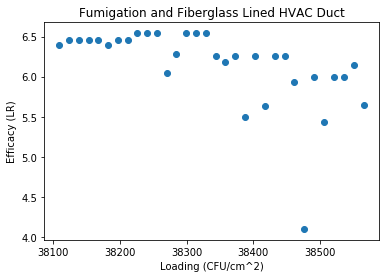

28
Relevant Surface


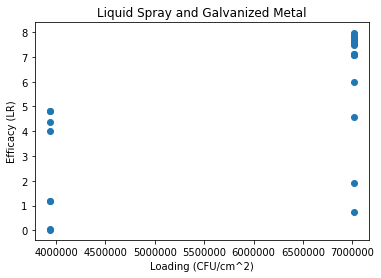

44
Relevant Surface


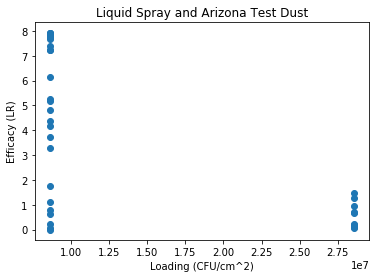

34
Relevant Surface


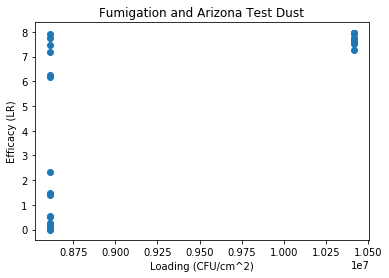

35
Relevant Surface


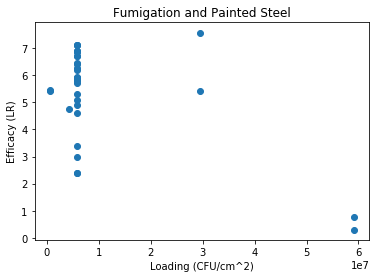

28
Relevant Surface


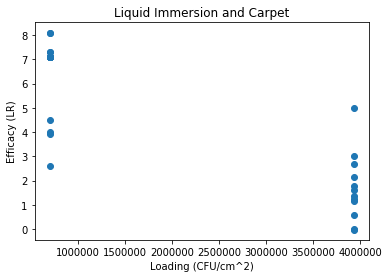

36
Relevant Surface


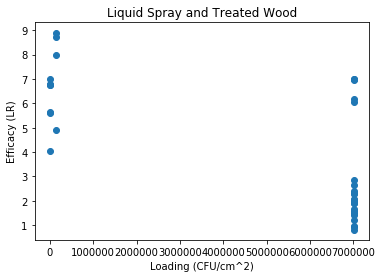

5
Relevant Surface


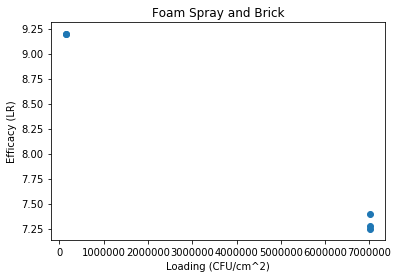

8
Relevant Surface


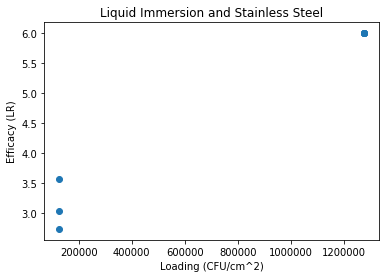

15


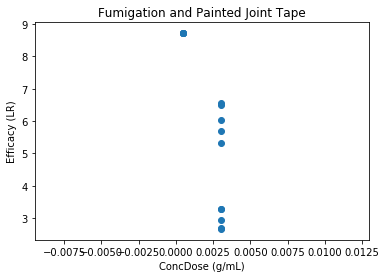

15
Relevant Surface


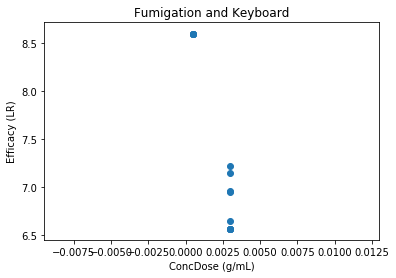

15
Relevant Surface


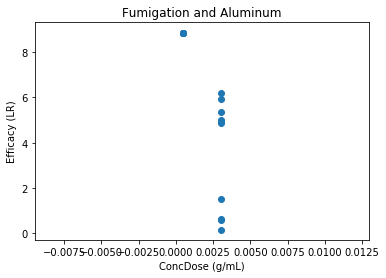

32
Relevant Surface


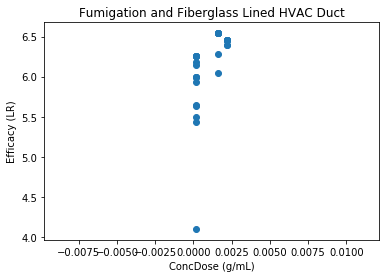

82
Relevant Surface


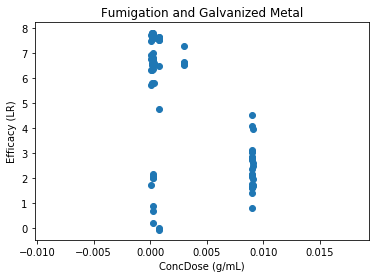

6
Relevant Surface


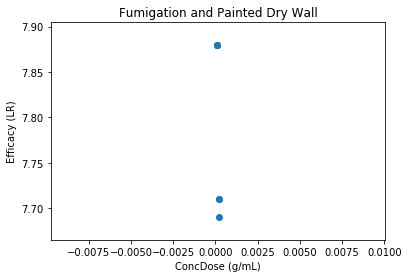

34
Relevant Surface


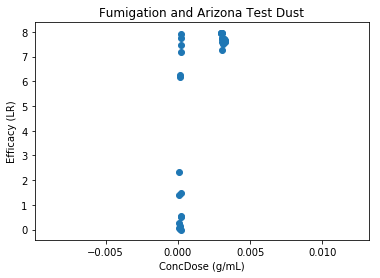

46
Relevant Surface


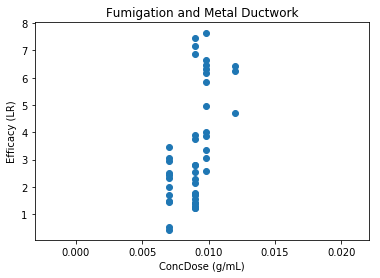

32
Relevant Surface


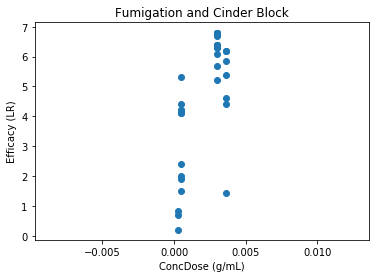

10
Relevant Surface


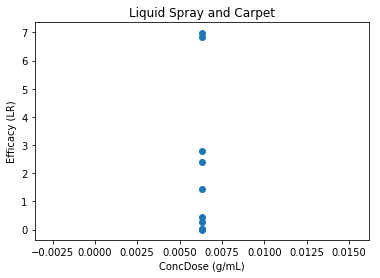

48
Relevant Surface


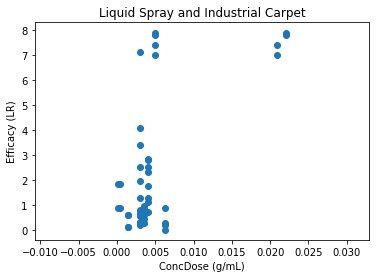

35


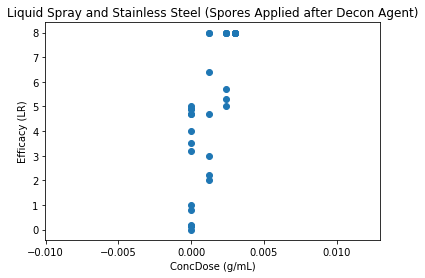

12
Relevant Surface


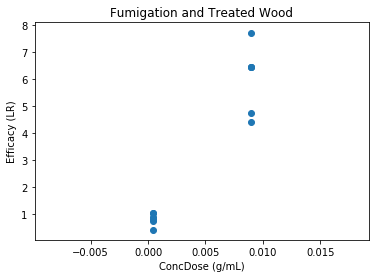

25


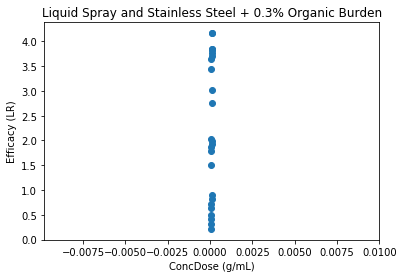

20


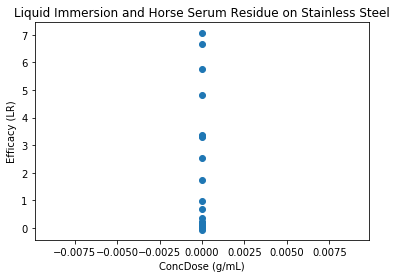

3
Relevant Surface


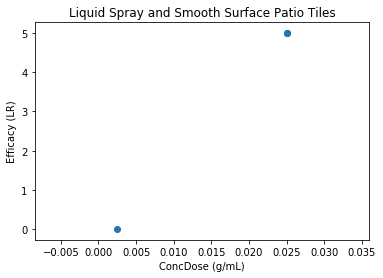

32
Relevant Surface


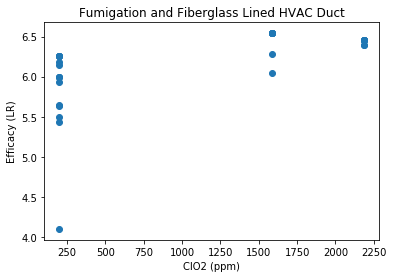

6
Relevant Surface


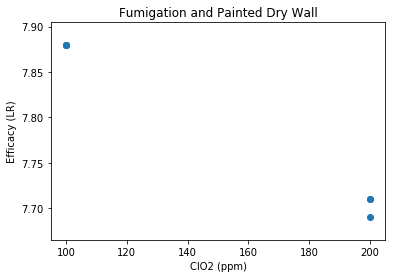

29
Relevant Surface


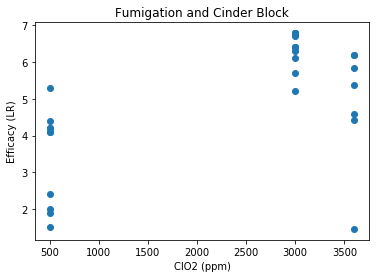

10
Relevant Surface


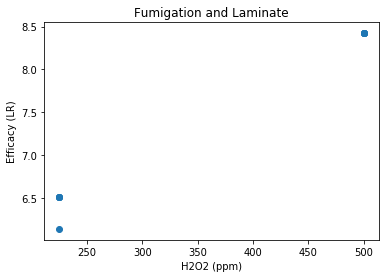

10
Relevant Surface


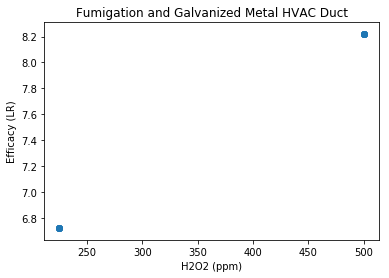

16


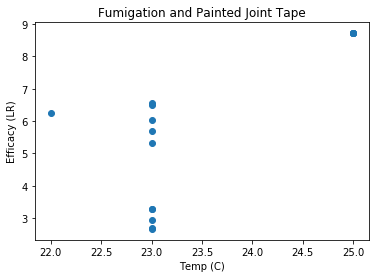

18
Relevant Surface


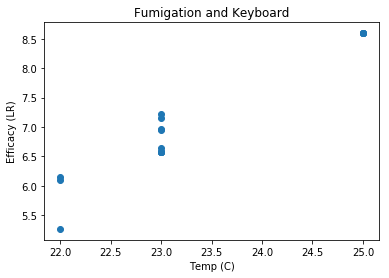

28
Relevant Surface


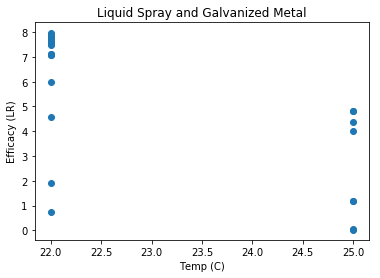

20


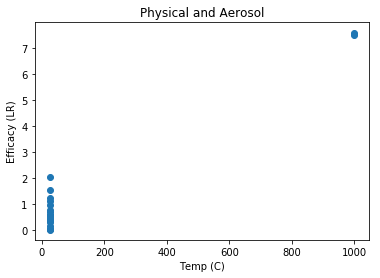

44
Relevant Surface


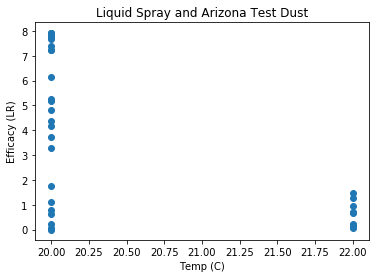

34
Relevant Surface


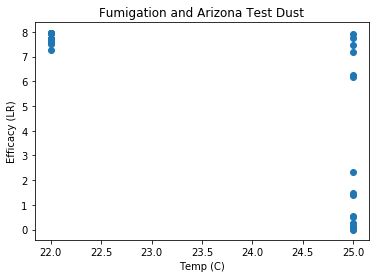

28
Relevant Surface


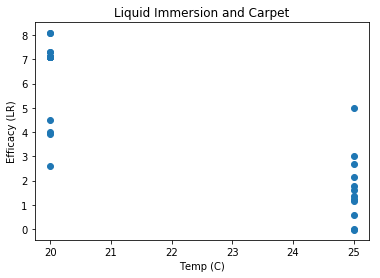

48


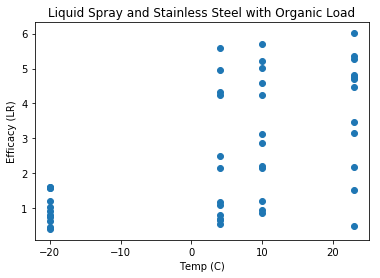

36
Relevant Surface


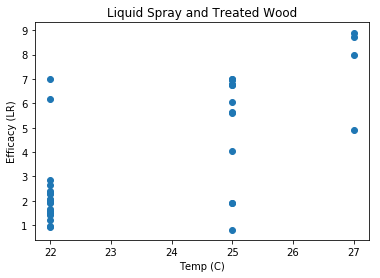

5
Relevant Surface


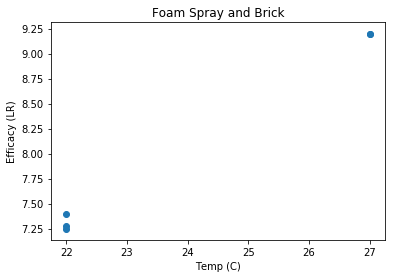

47
Relevant Surface


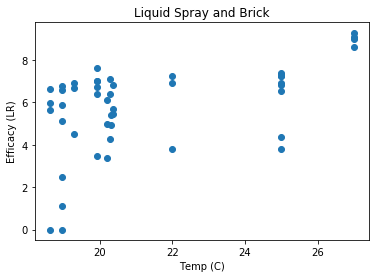

43
Relevant Surface


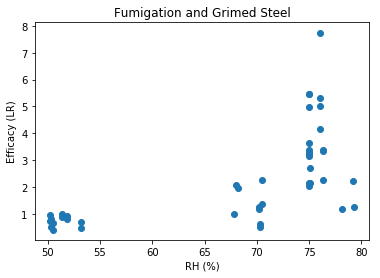

16


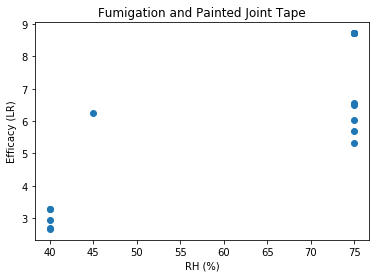

18
Relevant Surface


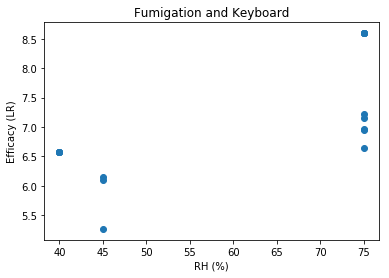

16
Relevant Surface


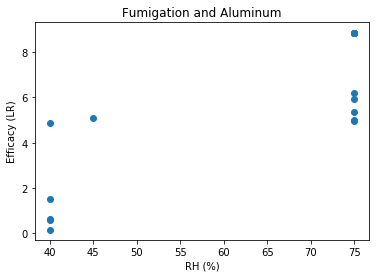

38
Relevant Surface


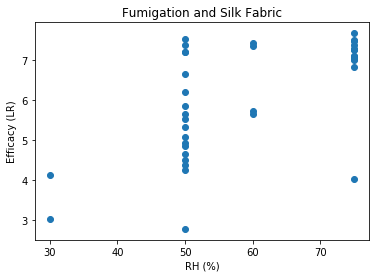

40


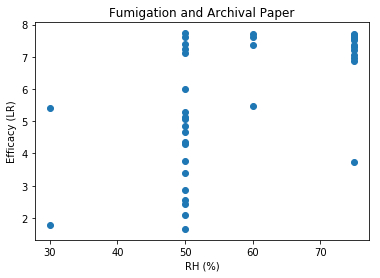

38
Relevant Surface


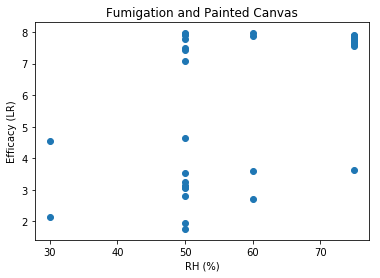

20


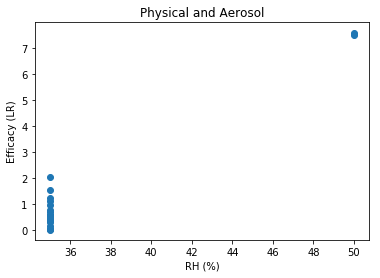

54
Relevant Surface


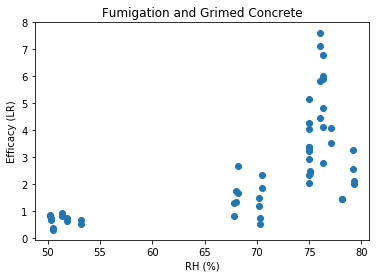

52
Relevant Surface


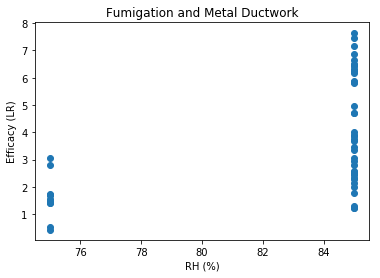

5
Relevant Surface


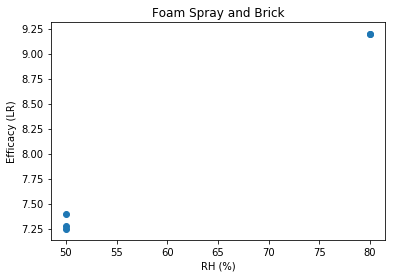

54


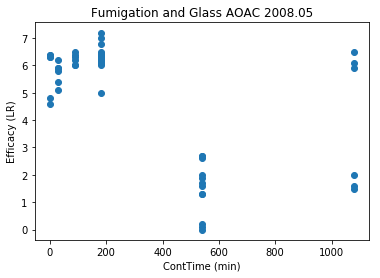

28
Relevant Surface


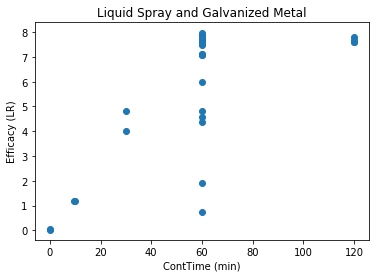

34
Relevant Surface


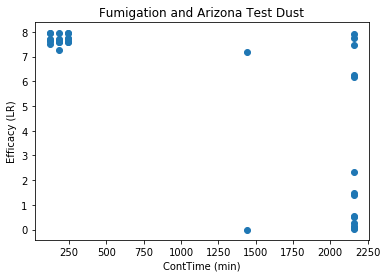

52
Relevant Surface


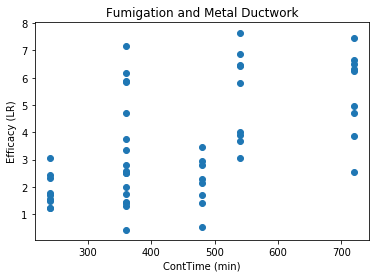

7
Relevant Surface


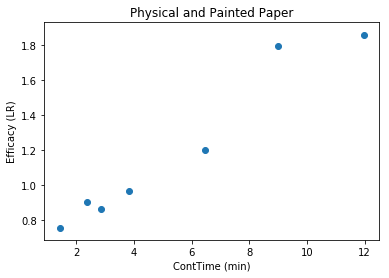

30


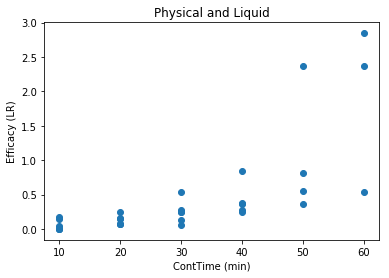

52
Relevant Surface


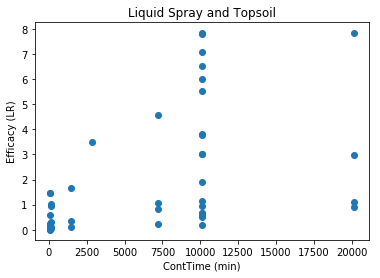

95
Relevant Surface


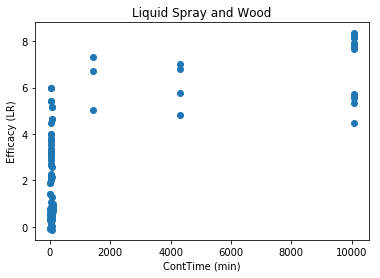

48


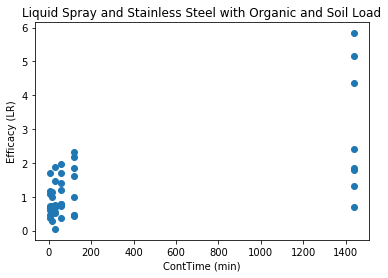

30
Relevant Surface


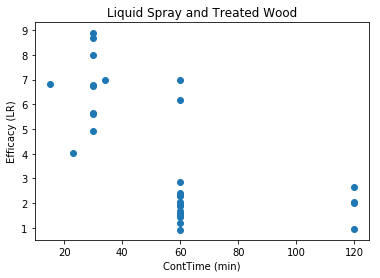

5
Relevant Surface


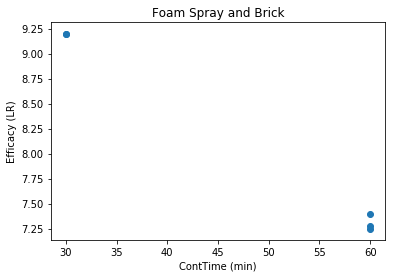

41
Relevant Surface


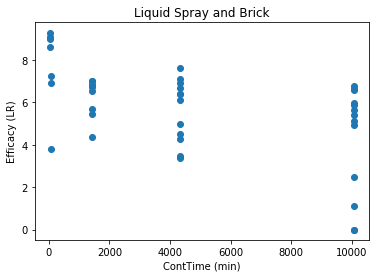

25


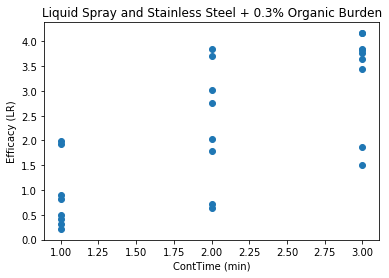

48


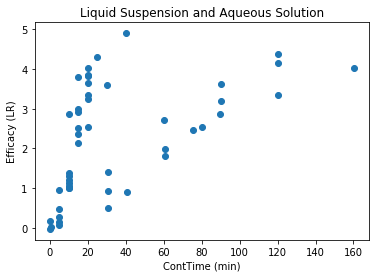

58
Relevant Surface


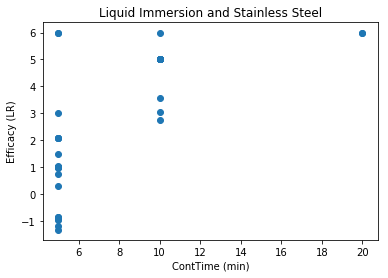

44


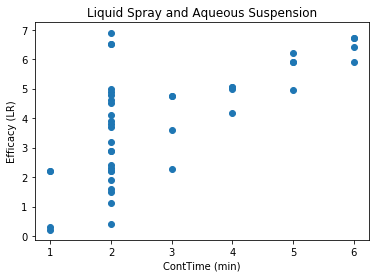

166
Relevant Surface


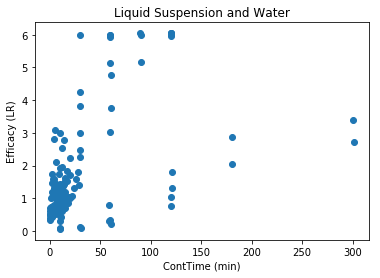

74


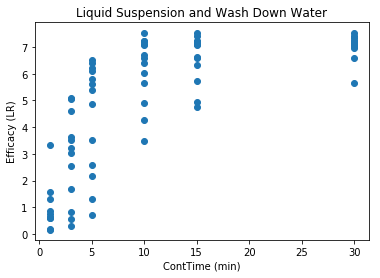

In [8]:
def scatterPlots(methodAndSurface, parameterName):
    delimiter = ' and '
    
    w = methodAndSurface.split(delimiter)
    method = w[0]
    methodName = " ".join([word.lower() for word in method.split(" ")])
    
    w.remove(w[0])

    material = delimiter.join(w)
    
    cd = master[(master['AppMethod'] == methodName) & (master['Surface'] == material) & (master['Eff'] == master['Eff']) & (master[parameterName] == master[parameterName])]
    
    if parameterName == 'Loading':
        cd = cd[(cd['LoadingUn'] == 'CFU/cm^2')]
        units = 'CFU/cm^2'
    elif parameterName == 'ConcDose':
        cd = cd[(cd['ConcDoseUn'] == 'g/mL')]
        units = 'g/mL'
    elif parameterName == 'ClO2':
        units = 'ppm'
    elif parameterName == 'H2O2':
        units = 'ppm'
    elif parameterName == 'Temp':
        units = 'C'
    elif parameterName == 'RH':
        units = '%'
    elif parameterName == 'ContTime':
        units = 'min'

    if len(cd) > 2:
        x_data = cd[parameterName]
        y_data = cd.Eff

        print(min(cd[parameterName].count(), cd.Eff.count()))

        if material in surfaces:
            print('Relevant Surface')
        
        plt.scatter(x_data, y_data)
        plt.xlabel(parameterName + ' (' + units + ')')
        plt.ylabel('Efficacy (LR)')
        plt.title(methodAndSurface)
        
        imgName = methodAndSurface + ' and ' + parameterName + ' graph.jpg'
        plt.savefig(imgName)
        
        imglst.append(imgName)
        
        plt.show()
        
for p in params:
    scatterPlots(*p)

In [9]:
#prs = Presentation('Correlation Template.pptx')

#left = Inches(4.17)
#top = Inches(3.0)
#width = Inches(5.0)

#slideNum = 1

#for img in imglst:
#    slide = prs.slides[slideNum]
#    pic = slide.shapes.add_picture(img, left, top, width=width)
#    slideNum += 1

#prs.save('Additional Correlation Graphs EP 6-17-2020.pptx')

In [10]:
params = [
    ('Fumigation and Cinder Block', 'ConcDose'),
    ('Liquid Spray and Carpet', 'ConcDose'),
    ('Liquid Spray and Painted Wallboard', 'ConcDose'),
    ('Liquid Spray and Industrial Carpet', 'ConcDose'),
    ('Liquid Spray and Stainless Steel (Spores Applied after Decon Agent)', 'ConcDose'),
    ('Fumigation and Treated Wood', 'ConcDose'),
    ('Liquid Spray and Stainless Steel + 0.3% Organic Burden', 'ConcDose'),
    ('Liquid Immersion and Horse Serum Residue on Stainless Steel', 'ConcDose'),
    ('Liquid Spray and Smooth Surface Patio Tiles', 'ConcDose')
]

32
Relevant Surface


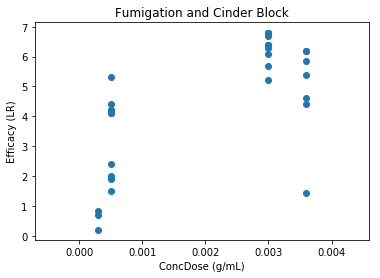

10
Relevant Surface


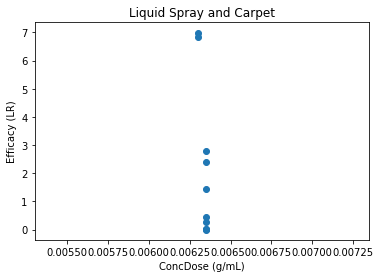

42
Relevant Surface


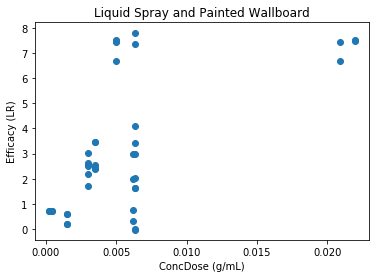

48
Relevant Surface


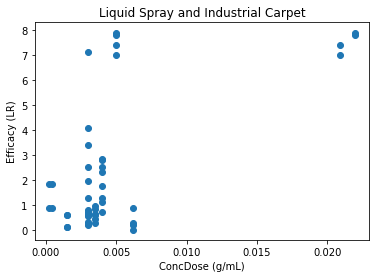

35


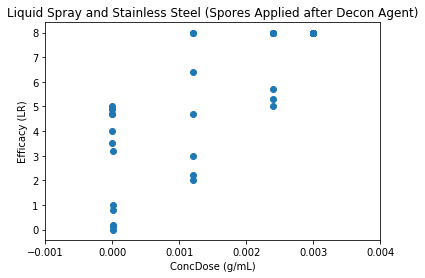

12
Relevant Surface


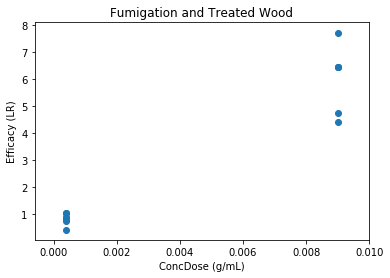

25


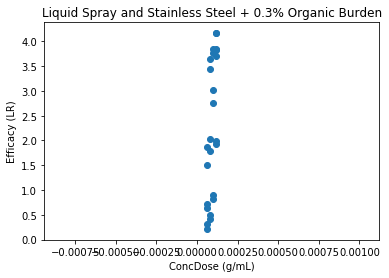

20


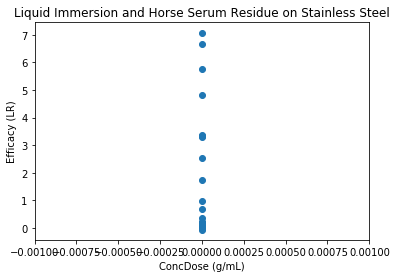

3
Relevant Surface


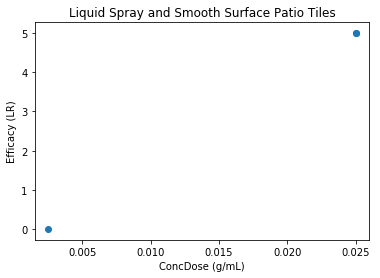

In [11]:
def scatterPlots(methodAndSurface, parameterName):
    delimiter = ' and '
    
    w = methodAndSurface.split(delimiter)
    method = w[0]
    methodName = " ".join([word.lower() for word in method.split(" ")])
    
    w.remove(w[0])

    material = delimiter.join(w)
    
    cd = master[(master['AppMethod'] == methodName) & (master['Surface'] == material) & (master['Eff'] == master['Eff']) & (master[parameterName] == master[parameterName])]
    
    cd = cd[(cd['ConcDoseUn'] == 'g/mL')]

    if len(cd) > 2:
        x_data = cd[parameterName]
        y_data = cd.Eff

        print(min(cd[parameterName].count(), cd.Eff.count()))

        if material in surfaces:
            print('Relevant Surface')
        
        plt.scatter(x_data, y_data)
        plt.xlabel(parameterName + ' (g/mL)')
        plt.ylabel('Efficacy (LR)')
        plt.title(methodAndSurface)
        
        plt.xlim(min(x_data) - 0.001, max(x_data) + 0.001)
        
        imgName = methodAndSurface + ' and ' + parameterName + ' graph.jpg'
        plt.savefig(imgName)
        
        imglst.append(imgName)
        
        plt.show()
        
for p in params:
    scatterPlots(*p)

In [12]:
params = [
    ('Liquid Immersion and Horse Serum Residue on Stainless Steel', 'ConcDose')
]

20


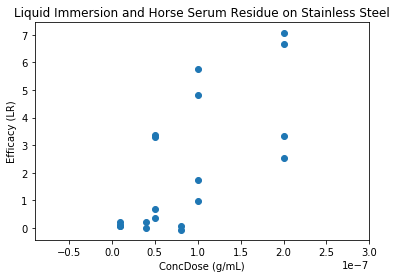

In [13]:
def scatterPlots(methodAndSurface, parameterName):
    delimiter = ' and '
    
    w = methodAndSurface.split(delimiter)
    method = w[0]
    methodName = " ".join([word.lower() for word in method.split(" ")])
    
    w.remove(w[0])

    material = delimiter.join(w)
    
    cd = master[(master['AppMethod'] == methodName) & (master['Surface'] == material) & (master['Eff'] == master['Eff']) & (master[parameterName] == master[parameterName])]
    
    cd = cd[(cd['ConcDoseUn'] == 'g/mL')]

    if len(cd) > 2:
        x_data = cd[parameterName]
        y_data = cd.Eff

        print(min(cd[parameterName].count(), cd.Eff.count()))

        if material in surfaces:
            print('Relevant Surface')
        
        plt.scatter(x_data, y_data)
        plt.xlabel(parameterName + ' (g/mL)')
        plt.ylabel('Efficacy (LR)')
        plt.title(methodAndSurface)
        
        plt.ticklabel_format(style='sci', axis='x')
        
        plt.xlim(min(x_data) - 0.0000001, max(x_data) + 0.0000001)
        
        imgName = methodAndSurface + ' and ' + parameterName + ' graph.jpg'
        plt.savefig(imgName)
        
        imglst.append(imgName)
        
        plt.show()
        
for p in params:
    scatterPlots(*p)